<a href="https://colab.research.google.com/github/MohakSinghania/Flight-Delay-Prediction-Model/blob/main/Flight_Delay_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

## DESCRIPTION

The code you provided imports various libraries and modules commonly used in data analysis and machine learning tasks. Here is a summary of each library and module:

**time:** A module for working with time-related functions, such as measuring execution time.
**datetime:** A module for working with dates and times, although it is not used explicitly in the provided code.
**numpy (imported as np):** A popular library for numerical computing in Python, providing support for mathematical operations on arrays and matrices.
**pandas (imported as pd):** A powerful library for data manipulation and analysis, providing data structures like DataFrames and various data manipulation functions.
**seaborn (imported as sns):**A data visualization library based on Matplotlib, offering a higher-level interface and stylish default themes for creating attractive statistical graphics.
**matplotlib (imported as mpl):** A comprehensive plotting library in Python, providing low-level and high-level interfaces for creating various types of plots.
**matplotlib.pyplot (imported as plt):** A sub-module of Matplotlib that provides a MATLAB-like interface for creating plots and visualizations.
**matplotlib.cm (imported as cm):** A submodule of Matplotlib that provides colormaps for visualizing data in plots.
**time.strftime and time.gmtime:** Functions from the time module for formatting and manipulating time values.
**matplotlib.gridspec:** A module in Matplotlib that provides control over the layout of subplots within a figure.
**sklearn.feature_selection.SelectFromModel:** A class in scikit-learn for feature selection based on importance weights derived from a fitted model.
**sklearn.model_selection.train_test_split:** A function in scikit-learn for splitting datasets into training and testing subsets.
**sklearn.ensemble.RandomForestRegressor:** A class in scikit-learn for implementing the random forest regression algorithm.
**sklearn.metrics.mean_absolute_error and sklearn.metrics.mean_squared_error:** Functions in scikit-learn for calculating evaluation metrics, such as mean absolute error and mean squared error.
**sklearn.preprocessing.LabelEncoder:** A class in scikit-learn for encoding categorical variables with integer labels.
**warnings:** A module in Python that provides utilities for issuing and handling warnings during program execution.

In [3]:
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from time import strftime , gmtime

import matplotlib.gridspec as gridspec

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# LOADING THE DATA

## Loading

In [4]:
flight_data = pd.read_csv("/content/flights.csv")

## Exploratory Data Analysis

In [5]:
flight_data.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1740355,2015,4,21,2,EV,6049,N10575,EWR,IAD,...,2117.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1500827,2015,4,7,2,AS,81,N706AS,SEA,ANC,...,829.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3282889,2015,7,24,5,EV,5236,N936EV,MOB,ATL,...,1539.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,652599,2015,2,13,5,UA,668,N440UA,ORD,LGA,...,915.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,3988136,2015,9,5,6,AS,615,N517AS,LAS,SEA,...,908.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
flight_data.loc[:,('YEAR' , 'MONTH' , 'DAY')].dtypes

YEAR     int64
MONTH    int64
DAY      int64
dtype: object

In [7]:
flight_data.count()

Unnamed: 0             872862
YEAR                   872862
MONTH                  872862
DAY                    872862
DAY_OF_WEEK            872862
AIRLINE                872862
FLIGHT_NUMBER          872862
TAIL_NUMBER            870613
ORIGIN_AIRPORT         872862
DESTINATION_AIRPORT    872862
SCHEDULED_DEPARTURE    872862
DEPARTURE_TIME         859935
DEPARTURE_DELAY        859935
TAXI_OUT               859511
WHEELS_OFF             859511
SCHEDULED_TIME         872862
ELAPSED_TIME           857061
AIR_TIME               857061
DISTANCE               872862
WHEELS_ON              858968
TAXI_IN                858968
SCHEDULED_ARRIVAL      872862
ARRIVAL_TIME           858968
ARRIVAL_DELAY          857061
DIVERTED               872862
CANCELLED              872862
CANCELLATION_REASON     13494
AIR_SYSTEM_DELAY       159157
SECURITY_DELAY         159157
AIRLINE_DELAY          159157
LATE_AIRCRAFT_DELAY    159157
WEATHER_DELAY          159157
dtype: int64

In [8]:
flight_data.head(15)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1740355,2015,4,21,2,EV,6049,N10575,EWR,IAD,...,2117.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1500827,2015,4,7,2,AS,81,N706AS,SEA,ANC,...,829.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3282889,2015,7,24,5,EV,5236,N936EV,MOB,ATL,...,1539.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,652599,2015,2,13,5,UA,668,N440UA,ORD,LGA,...,915.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,3988136,2015,9,5,6,AS,615,N517AS,LAS,SEA,...,908.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,1009312,2015,3,7,6,AA,1662,N4XBAA,DFW,DAY,...,2359.0,42.0,0,0,NaN,0.0,0.0,0.0,42.0,0.0
6,2437692,2015,6,4,4,AA,1566,N3DMAA,SAN,ORD,...,1304.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2564447,2015,6,11,4,B6,1059,N296JB,BOS,PHL,...,1727.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,892930,2015,2,28,6,MQ,3475,N629MQ,CID,ORD,...,1433.0,23.0,0,0,NaN,0.0,0.0,2.0,21.0,0.0
9,777162,2015,2,21,6,B6,721,N526JB,BOS,PBI,...,953.0,28.0,0,0,NaN,0.0,0.0,28.0,0.0,0.0


In [9]:
flight_data.dtypes

Unnamed: 0               int64
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: o

# DEFINING FUNCTION FOR NULL VALUES

In [10]:
def conv_time(time_val):
  if pd.isnull(time_val):
    return np.nan
  else:
    if time_val == 2400 :
      time_val = 0
    time_val = "{0:04d}".format(int(time_val))
    time_formatted = datetime.time(int(time_val[0:2]) , int(time_val[2:4]))
  return time_formatted

In [11]:
flight_data['ARRIVAL_TIME'] = flight_data['ARRIVAL_TIME'].apply(conv_time)
flight_data['DEPARTURE_TIME'] = flight_data['DEPARTURE_TIME'].apply(conv_time)
flight_data['SCHEDULED_DEPARTURE'] = flight_data['SCHEDULED_DEPARTURE'].apply(conv_time)
flight_data['WHEELS_OFF'] = flight_data['WHEELS_OFF'].apply(conv_time)
flight_data['WHEELS_ON'] = flight_data['WHEELS_ON'].apply(conv_time)
flight_data['SCHEDULED_ARRIVAL'] = flight_data['SCHEDULED_ARRIVAL'].apply(conv_time)

In [12]:
flight_data[['YEAR' , 'MONTH' , 'DAY' , 'SCHEDULED_DEPARTURE' , 'DEPARTURE_TIME' , 'DEPARTURE_DELAY' , 'TAXI_OUT' ,
             'WHEELS_OFF' , 'SCHEDULED_TIME' , 'ELAPSED_TIME' , 'AIR_TIME' , 'WHEELS_ON' , 'TAXI_IN' , 'SCHEDULED_ARRIVAL' ,
             'ARRIVAL_TIME' , 'ARRIVAL_DELAY' , 'AIR_SYSTEM_DELAY' , 'SECURITY_DELAY' , 'AIRLINE_DELAY' , 'LATE_AIRCRAFT_DELAY']].dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF              object
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
WHEELS_ON               object
TAXI_IN                float64
SCHEDULED_ARRIVAL       object
ARRIVAL_TIME            object
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

In [13]:
def nulAnalysis(df):
  tab_info = pd.DataFrame(df.dtypes).T.rename(index = { 0 : 'column type'})

  tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0 : 'null values (nb)'}))
  tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index = {0 : 'null values (%)'}))
  return tab_info

In [14]:
nulAnalysis(flight_data)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,int64,object,int64,object,object,object,...,object,float64,int64,int64,object,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,2249,0,0,...,13894,15801,0,0,859368,713705,713705,713705,713705,713705
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257658,0.0,0.0,...,1.591775,1.810252,0.0,0.0,98.454051,81.766075,81.766075,81.766075,81.766075,81.766075


In [15]:
flight_data.loc[flight_data['AIRLINE_DELAY'].notnull() , ['AIRLINE_DELAY','AIR_SYSTEM_DELAY' , 'SECURITY_DELAY' , 'AIRLINE_DELAY' , 'LATE_AIRCRAFT_DELAY' , 'WEATHER_DELAY']]

,AIRLINE_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5,0.0,0.0,0.0,0.0,42.0,0.0
8,2.0,0.0,0.0,2.0,21.0,0.0
9,28.0,0.0,0.0,28.0,0.0,0.0
14,0.0,14.0,0.0,0.0,8.0,0.0
17,0.0,0.0,0.0,0.0,16.0,0.0
...,...,...,...,...,...,...
872848,2.0,0.0,0.0,2.0,14.0,0.0
872853,0.0,88.0,0.0,0.0,0.0,0.0
872855,0.0,22.0,0.0,0.0,0.0,0.0
872858,0.0,86.0,0.0,0.0,39.0,0.0


# FILLING THE NULL VALUES

In [16]:
flight_data['AIRLINE_DELAY'] = flight_data['AIRLINE_DELAY'].fillna(0)
flight_data['AIR_SYSTEM_DELAY'] = flight_data['AIR_SYSTEM_DELAY'].fillna(0)
flight_data['SECURITY_DELAY'] = flight_data['SECURITY_DELAY'].fillna(0)
flight_data['LATE_AIRCRAFT_DELAY'] = flight_data['LATE_AIRCRAFT_DELAY'].fillna(0)
flight_data['WEATHER_DELAY'] = flight_data['WEATHER_DELAY'].fillna(0)

In [17]:
nulAnalysis(flight_data)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,int64,object,int64,object,object,object,...,object,float64,int64,int64,object,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,2249,0,0,...,13894,15801,0,0,859368,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257658,0.0,0.0,...,1.591775,1.810252,0.0,0.0,98.454051,0.0,0.0,0.0,0.0,0.0


In [18]:
flight_data.loc[flight_data['CANCELLATION_REASON'].notnull() , ['CANCELLATION_REASON']].head(15)

,CANCELLATION_REASON
94,B
128,C
129,A
158,A
254,A
316,B
369,A
406,C
719,A
862,B


In [19]:
flight_data['CANCELLATION_REASON'].value_counts()

B    7344
A    3779
C    2370
D       1
Name: CANCELLATION_REASON, dtype: int64

In [20]:
flight_data.loc[flight_data['CANCELLATION_REASON'] == 'A' , 'CANCELLATION_REASON'] = 1
flight_data.loc[flight_data['CANCELLATION_REASON'] == 'B' , 'CANCELLATION_REASON'] = 2
flight_data.loc[flight_data['CANCELLATION_REASON'] == 'C' , 'CANCELLATION_REASON'] = 3
flight_data.loc[flight_data['CANCELLATION_REASON'] == 'D' , 'CANCELLATION_REASON'] = 4

flight_data['CANCELLATION_REASON'] = flight_data['CANCELLATION_REASON'].fillna(0)

In [21]:
nulAnalysis(flight_data)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,int64,object,int64,object,object,object,...,object,float64,int64,int64,int64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,2249,0,0,...,13894,15801,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257658,0.0,0.0,...,1.591775,1.810252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
flight_data = flight_data.dropna(axis = 0)

In [23]:
df_times = flight_data[
[
    'SCHEDULED_DEPARTURE',
    'DEPARTURE_TIME',
    'DEPARTURE_DELAY',
    'TAXI_OUT',
    'WHEELS_OFF',
    'SCHEDULED_TIME',
    'ELAPSED_TIME',
    'AIR_TIME',
    'DISTANCE',
    'WHEELS_ON',
    'TAXI_IN',
    'SCHEDULED_ARRIVAL',
    'ARRIVAL_TIME',
    'ARRIVAL_DELAY',
    'DIVERTED',
    'CANCELLED',
    'CANCELLATION_REASON',
    'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY',
    'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY',
    'WEATHER_DELAY'
]]

# DESCRIBING THE DATA

In [24]:
pd.set_option('float_format','{:f}'.format)
df_times.describe()

,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000,857061.000000
mean,9.282507,16.058071,141.843597,136.959141,113.476684,824.105187,7.424386,4.398053,0.000000,0.000000,0.000000,2.494990,0.013935,3.550824,4.349265,0.536352
std,36.816619,8.863004,75.213858,74.122796,72.143578,607.929873,5.599204,39.191761,0.000000,0.000000,0.000000,13.112768,0.910344,22.251792,20.586439,8.724224
min,-42.000000,1.000000,18.000000,15.000000,7.000000,31.000000,1.000000,-81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.000000,11.000000,85.000000,82.000000,60.000000,373.000000,4.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,14.000000,123.000000,118.000000,94.000000,650.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,19.000000,174.000000,168.000000,144.000000,1065.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1609.000000,180.000000,705.000000,726.000000,683.000000,4983.000000,178.000000,1598.000000,0.000000,0.000000,0.000000,798.000000,364.000000,1563.000000,1331.000000,1120.000000


# LOADING AIRLINES DATASET

In [25]:
airlines_data = pd.read_csv("/content/airlines.csv")
airlines_data

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [26]:
# Counting the Airlines
flight_data['AIRLINE'].value_counts()

WN    186711
DL    130165
AA    106910
OO     86310
EV     83216
UA     75919
MQ     41677
B6     39048
US     29403
AS     26081
NK     17476
F9     13452
HA     11553
VX      9140
Name: AIRLINE, dtype: int64

# JOINING THE DATA

In [27]:
flight_data = flight_data.merge(airlines_data , left_on = 'AIRLINE' , right_on = 'IATA_CODE' , how ='inner')

In [28]:
flight_data.tail()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
857056,532696,2015,2,5,4,VX,334,N836VA,SFO,LAX,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America
857057,545967,2015,2,5,4,VX,34,N838VA,SFO,JFK,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America
857058,3727719,2015,8,19,3,VX,170,N632VA,LAX,EWR,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America
857059,1529094,2015,4,8,3,VX,347,N361VA,FLL,SFO,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America
857060,4345354,2015,9,28,1,VX,928,N630VA,SFO,LAX,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,VX,Virgin America


In [29]:
flight_data = flight_data.drop(['AIRLINE_x' , 'IATA_CODE'] , axis = 1)
flight_data = flight_data.rename(columns = {'AIRLINE_y':'AIRLINE'})

In [30]:
flight_data.tail()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
857056,532696,2015,2,5,4,334,N836VA,SFO,LAX,08:05:00,...,4.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America
857057,545967,2015,2,5,4,34,N838VA,SFO,JFK,23:20:00,...,7.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America
857058,3727719,2015,8,19,3,170,N632VA,LAX,EWR,23:30:00,...,-5.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America
857059,1529094,2015,4,8,3,347,N361VA,FLL,SFO,17:40:00,...,-17.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America
857060,4345354,2015,9,28,1,928,N630VA,SFO,LAX,13:25:00,...,2.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Virgin America


# CALCULATING SUM AND COUNT OF GROUPED DATA

In [43]:
flight_data_grouped_sum = flight_data.groupby('AIRLINE' , as_index = False)['ARRIVAL_DELAY'].agg('sum').rename(columns={'ARRIVAL_DELAY':'ARRIVAL_DELAY_SUM'})
flight_data_grouped_cnt = flight_data.groupby('AIRLINE' , as_index = False)['ARRIVAL_DELAY'].agg('count').rename(columns={'ARRIVAL_DELAY':'ARRIVAL_DELAY_CNT'})

In [45]:
flight_data_grouped_delay = flight_data_grouped_sum.merge(flight_data_grouped_cnt , left_on = 'AIRLINE' , right_on = 'AIRLINE' , how = 'inner')

In [46]:
flight_data_grouped_delay.loc[: , 'AVG_DELAY_AIRLINE'] = flight_data_grouped_delay['ARRIVAL_DELAY_SUM'] / flight_data_grouped_delay['ARRIVAL_DELAY_CNT']
flight_data_grouped_delay.sort_values('ARRIVAL_DELAY_SUM' , ascending = False)

,AIRLINE,ARRIVAL_DELAY_SUM,ARRIVAL_DELAY_CNT,AVG_DELAY_AIRLINE
9,Southwest Airlines Co.,811263.000000,186711,4.345020
3,Atlantic Southeast Airlines,519483.000000,83216,6.242586
8,Skywest Airlines Inc.,513086.000000,86310,5.944688
12,United Air Lines Inc.,402987.000000,75919,5.308118
1,American Airlines Inc.,364930.000000,106910,3.413432
2,American Eagle Airlines Inc.,271030.000000,41677,6.503107
7,JetBlue Airways,261355.000000,39048,6.693173
10,Spirit Air Lines,248525.000000,17476,14.220932
5,Frontier Airlines Inc.,165262.000000,13452,12.285311
11,US Airways Inc.,120095.000000,29403,4.084447


In [47]:
flight_data.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,1740355,2015,4,21,2,6049,N10575,EWR,IAD,19:43:00,...,5.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Atlantic Southeast Airlines
1,3282889,2015,7,24,5,5236,N936EV,MOB,ATL,13:22:00,...,2.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Atlantic Southeast Airlines
2,4835962,2015,10,29,4,4637,N14186,12266,11540,13:29:00,...,-3.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Atlantic Southeast Airlines
3,1656851,2015,4,16,4,2559,N687JS,VPS,DFW,15:46:00,...,99.000000,0,0,0,4.000000,0.000000,95.000000,0.000000,0.000000,Atlantic Southeast Airlines
4,5404320,2015,12,5,6,5165,N755EV,SYR,DTW,06:00:00,...,-15.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,Atlantic Southeast Airlines


# FILTERING

In [48]:
flight_data['DELAYED'] = flight_data.loc[: , 'ARRIVAL_DELAY'].values > 0

In [49]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857061 entries, 0 to 857060
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           857061 non-null  int64  
 1   YEAR                 857061 non-null  int64  
 2   MONTH                857061 non-null  int64  
 3   DAY                  857061 non-null  int64  
 4   DAY_OF_WEEK          857061 non-null  int64  
 5   FLIGHT_NUMBER        857061 non-null  int64  
 6   TAIL_NUMBER          857061 non-null  object 
 7   ORIGIN_AIRPORT       857061 non-null  object 
 8   DESTINATION_AIRPORT  857061 non-null  object 
 9   SCHEDULED_DEPARTURE  857061 non-null  object 
 10  DEPARTURE_TIME       857061 non-null  object 
 11  DEPARTURE_DELAY      857061 non-null  float64
 12  TAXI_OUT             857061 non-null  float64
 13  WHEELS_OFF           857061 non-null  object 
 14  SCHEDULED_TIME       857061 non-null  float64
 15  ELAPSED_TIME     

In [50]:
flight_data.isna().sum()

Unnamed: 0             0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
AIRLINE                0
DELAYED                0
dtype: int64

In [51]:
nulAnalysis(flight_data)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAYED
column type,int64,int64,int64,int64,int64,int64,object,object,object,object,...,int64,int64,int64,float64,float64,float64,float64,float64,object,bool
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
flight_data.shape

(857061, 33)

# TRAINING THE MODEL

In [53]:
feature_list = [
    'YEAR',
    'MONTH',
    'DAY',
    'AIRLINE',
    'LATE_AIRCRAFT_DELAY',
    'AIRLINE_DELAY',
    'AIR_SYSTEM_DELAY',
    'WEATHER_DELAY',
    'ELAPSED_TIME',
    'DEPARTURE_DELAY',
    'SCHEDULED_TIME',
    'AIR_TIME',
    'DISTANCE',
    'TAXI_IN',
    'TAXI_OUT',
    'DAY_OF_WEEK',
    'SECURITY_DELAY'
]

In [56]:
X = flight_data[feature_list]

In [57]:
encoder = LabelEncoder()
X.iloc[:,feature_list.index('AIRLINE')] = encoder.fit_transform(X.iloc[:,feature_list.index('AIRLINE')])

In [59]:
encoder.inverse_transform(X.iloc[:, feature_list.index('AIRLINE')])


array(['Atlantic Southeast Airlines', 'Atlantic Southeast Airlines',
       'Atlantic Southeast Airlines', ..., 'Virgin America',
       'Virgin America', 'Virgin America'], dtype=object)

In [60]:
y = flight_data.ARRIVAL_DELAY
y = np.array(y)

In [61]:
X = np.array(X)

In [62]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [63]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(599942, 17) (599942,) (257119, 17) (257119,)


# FITTING THE RANDOM FOREST MODEL

In [64]:
forest = RandomForestRegressor(n_estimators = 100 , random_state = 42)

In [66]:
forest.fit(x_train , y_train)

RandomForestRegressor(random_state=42)

In [67]:
y_pred = forest.predict(x_test)

In [68]:
y_pred.shape

(257119,)

# RESULTS

In [69]:
print('Mean Absolute Error :' , mean_absolute_error(y_true = y_test , y_pred = y_pred))
print('Mean Squared Error :' , mean_squared_error(y_true = y_test , y_pred = y_pred))
print('root Mean Squared Error :' , np.sqrt(mean_squared_error(y_true = y_test , y_pred = y_pred)))


Mean Absolute Error : 0.6475779697338585
Mean Squared Error : 3.5324625095772766
root Mean Squared Error : 1.8794846393565647


In [70]:
importances = list(forest.feature_importances_)
print(importances)

[0.0, 0.00020738734494332687, 0.0002578051051108778, 0.0002287798289948587, 0.003388689626631282, 0.0036553890130512304, 0.05547531464376015, 0.0006816647106044937, 0.02030369872683918, 0.884063158210291, 0.020105626118339884, 0.0004918400592828846, 0.00025156524571615595, 0.00267724478739861, 0.008015963299062399, 0.00015504900837348505, 4.082427160028038e-05]


In [71]:
feature_importances = [(feature , round(importance , 2)) for feature , importance in zip(feature_list , importances)]
feature_importances = sorted(feature_importances , key = lambda x : x[1] , reverse = True)

In [72]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DEPARTURE_DELAY      Importance: 0.88
Variable: AIR_SYSTEM_DELAY     Importance: 0.06
Variable: ELAPSED_TIME         Importance: 0.02
Variable: SCHEDULED_TIME       Importance: 0.02
Variable: TAXI_OUT             Importance: 0.01
Variable: YEAR                 Importance: 0.0
Variable: MONTH                Importance: 0.0
Variable: DAY                  Importance: 0.0
Variable: AIRLINE              Importance: 0.0
Variable: LATE_AIRCRAFT_DELAY  Importance: 0.0
Variable: AIRLINE_DELAY        Importance: 0.0
Variable: WEATHER_DELAY        Importance: 0.0
Variable: AIR_TIME             Importance: 0.0
Variable: DISTANCE             Importance: 0.0
Variable: TAXI_IN              Importance: 0.0
Variable: DAY_OF_WEEK          Importance: 0.0
Variable: SECURITY_DELAY       Importance: 0.0


# DATA VISUALIZATION

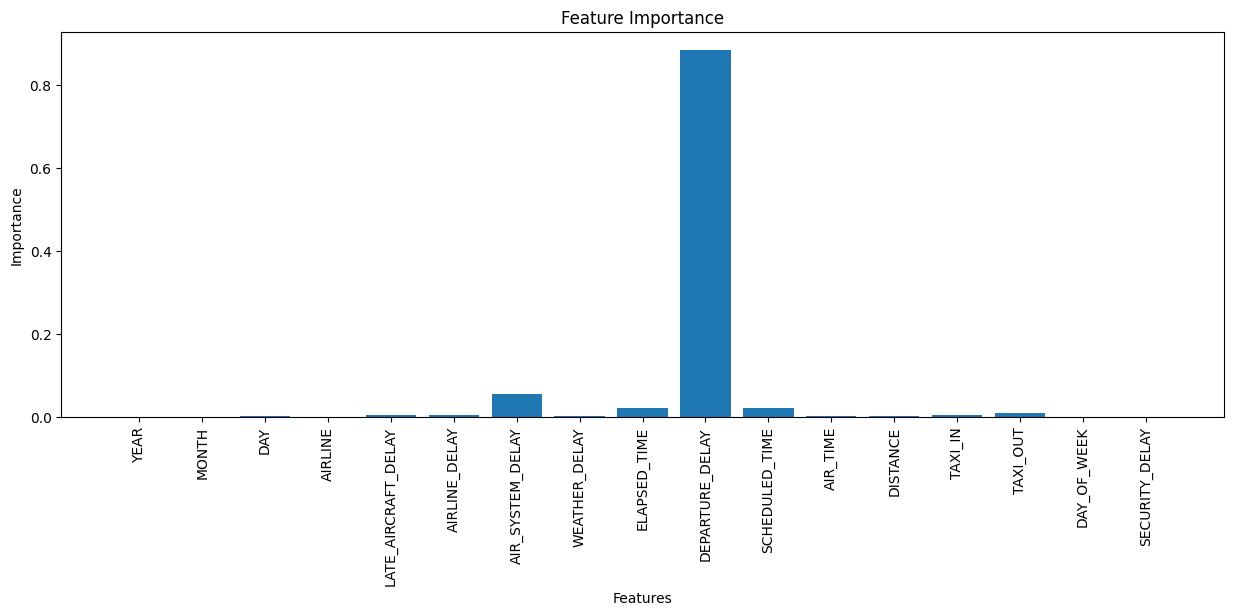

In [73]:
plt.figure(figsize = (15,5))
x_values = list(range(len(importances)))
plt.bar(x_values , importances , orientation = 'vertical')
plt.xticks(x_values , feature_list , rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Feature Importance')
plt.show()

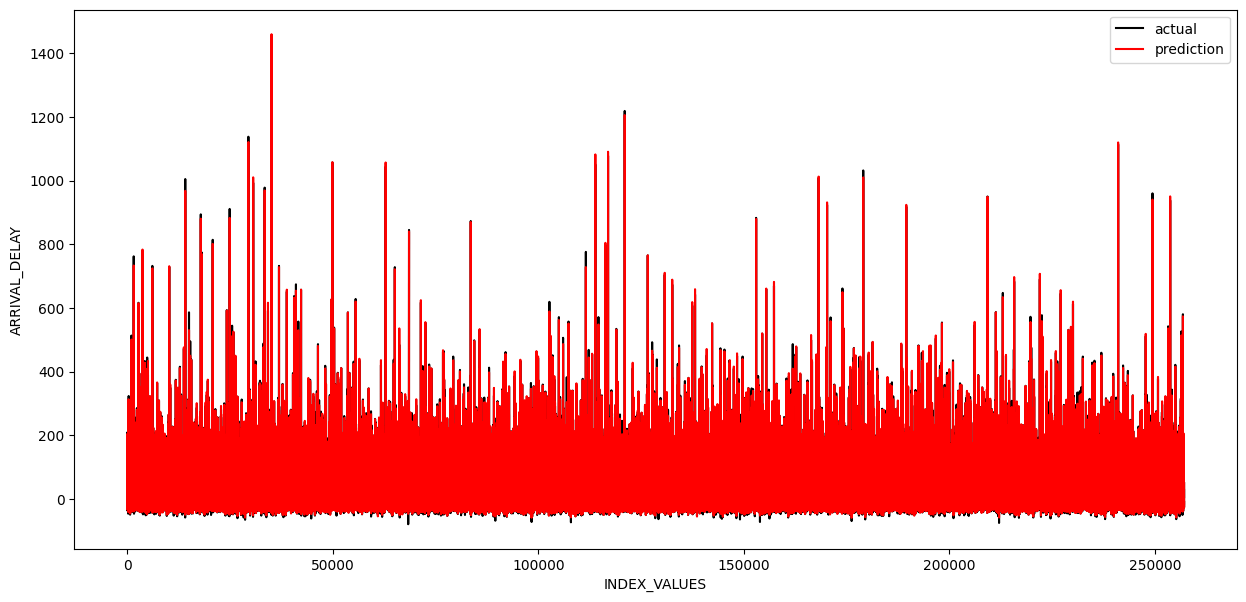

In [74]:
plt.figure(figsize = (15,7))
plt.plot(y_test , label = 'actual' , color = 'black')
plt.plot(y_pred , label = 'prediction' , color = 'red')
plt.xlabel('INDEX_VALUES')
plt.ylabel('ARRIVAL_DELAY')
plt.legend()
plt.show()

# MODEL ACCURACY

In [75]:
print('R^2 score for test-set : ' , forest.score(x_test , y_test))

R^2 score for test-set :  0.9976618322587423
